PCA is used here to determine if month, temperature, or precipitation has significant effect on the NOx concentration at each monitoring site

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_excel('BHL PCA.xlsx', sheet_name='Monthly ppt and temp_trimmed')
dataset.head()

,Year,Month,Precip (cm),Temp (C),S11 NOx (mg/L),S12 NOx (mg/L),T12 NOx (mg/L)
0,2015,3,1.4732,3.000000,49.881450,10.88840,13.020500
1,2015,4,11.3538,10.000000,46.129780,12.33426,13.993825
2,2015,5,11.6332,14.611111,45.923850,10.41450,15.625580
3,2015,6,19.4056,20.666667,37.787071,8.63195,16.626840
4,2015,7,24.0792,21.833333,26.937750,5.19046,16.490175


## S11 dataset

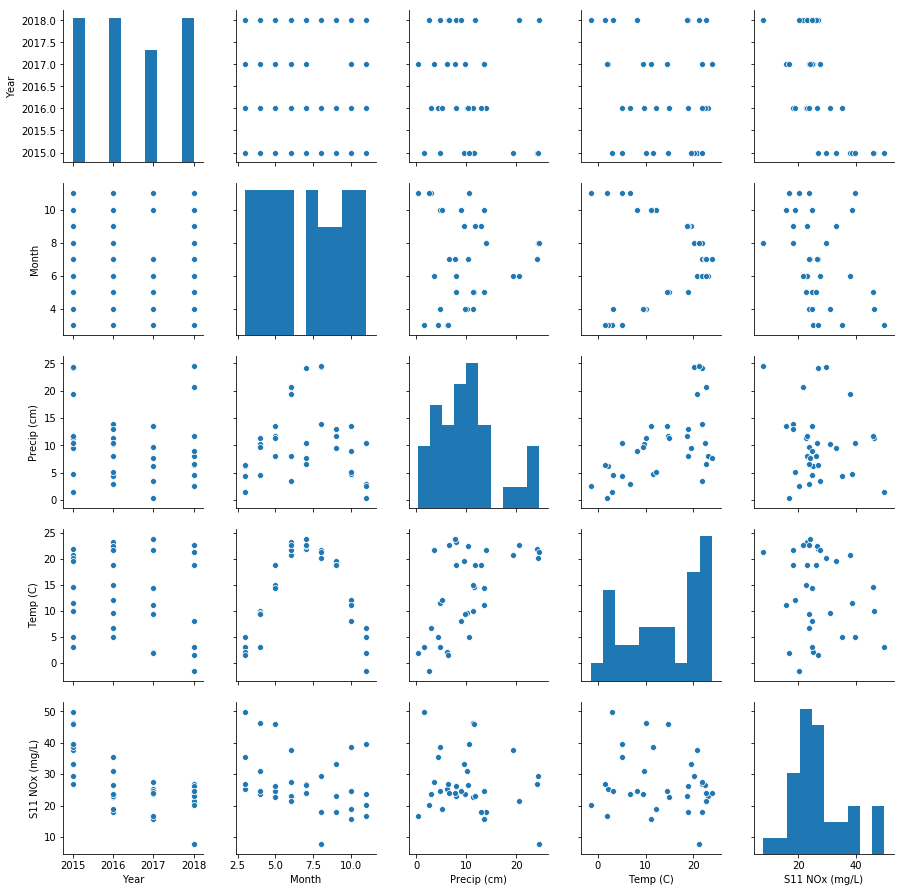

In [2]:
feature_list = list(dataset.columns[0:5])
feature = dataset[feature_list]
sns.pairplot(feature)

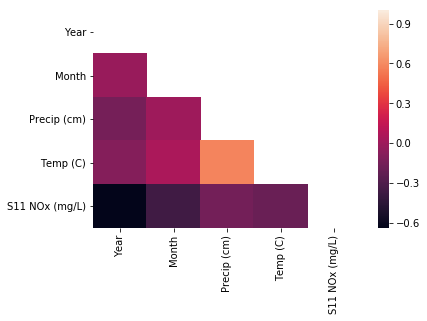

In [3]:
corr = feature.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


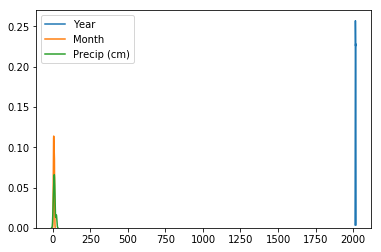

In [22]:
from sklearn.preprocessing import StandardScaler

X_data = feature.iloc[:,0:3]
Y_data = feature.iloc[:,4]

scaled_data = StandardScaler()
scaled_X = scaled_data.fit_transform(X_data)

sns.kdeplot(X_data.iloc[:,0])
sns.kdeplot(X_data.iloc[:,1])
sns.kdeplot(X_data.iloc[:,2])

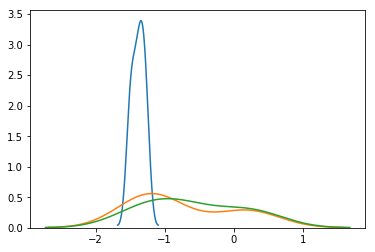

In [15]:
sns.kdeplot(scaled_X[0])
sns.kdeplot(scaled_X[1])
sns.kdeplot(scaled_X[2])

In [17]:
from sklearn.decomposition import PCA
pcal = PCA(n_components =3)
pcal.fit(scaled_X)
trained_pcal = pcal.transform(scaled_X)

trained_pcal.shape

(34, 3)

In [23]:
pc_df = pd.DataFrame(data=trained_pcal, columns = ['PC1', 'PC2', 'PC3'])
pc_df['Cluster'] = Y_data
pc_df.head()

,PC1,PC2,PC3,Cluster
0,-0.189061,-1.369321,-1.961303,49.881450
1,0.944161,-1.150936,-0.837798,46.129780
2,1.008921,-0.776976,-0.785239,45.923850
3,1.907534,-0.524431,0.103111,37.787071
4,2.461299,-0.221673,0.645811,26.937750


In [28]:
df = pd.DataFrame({'var':pcal.explained_variance_ratio_, 'PC':['PC1','PC2','PC3']})
df

,var,PC
0,0.384051,PC1
1,0.333093,PC2
2,0.282855,PC3


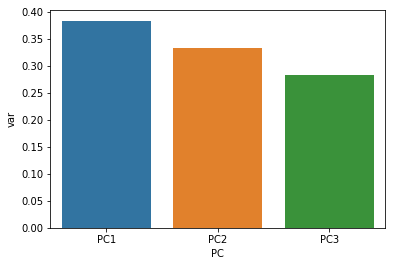

In [20]:
sns.barplot(x='PC', y='var', data=df)

## S12 dataset

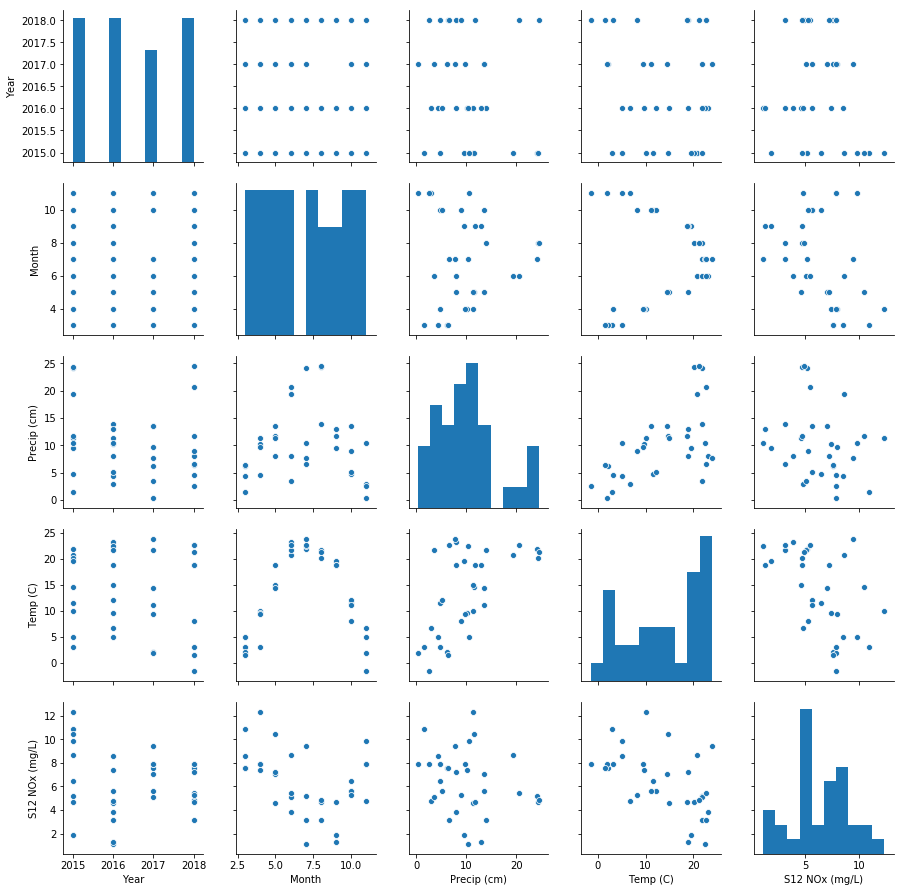

In [26]:
feature = dataset.iloc[:, [0,1,2,3,5]]
sns.pairplot(feature)

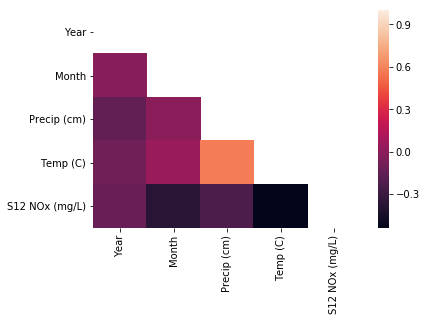

In [27]:
corr = feature.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


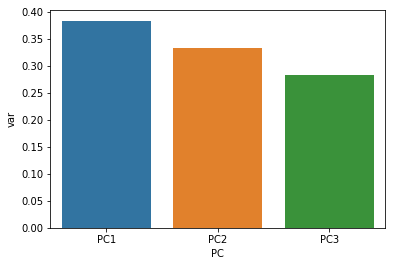

In [29]:
from sklearn.preprocessing import StandardScaler

X_data = feature.iloc[:,0:3]
Y_data = feature.iloc[:,4]

scaled_data = StandardScaler()
scaled_X = scaled_data.fit_transform(X_data)

from sklearn.decomposition import PCA
pcal = PCA(n_components =3)
pcal.fit(scaled_X)
trained_pcal = pcal.transform(scaled_X)

pc_df = pd.DataFrame(data=trained_pcal, columns = ['PC1', 'PC2', 'PC3'])
pc_df['Cluster'] = Y_data

df = pd.DataFrame({'var':pcal.explained_variance_ratio_, 'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC', y='var', data=df)

## T12 dataset

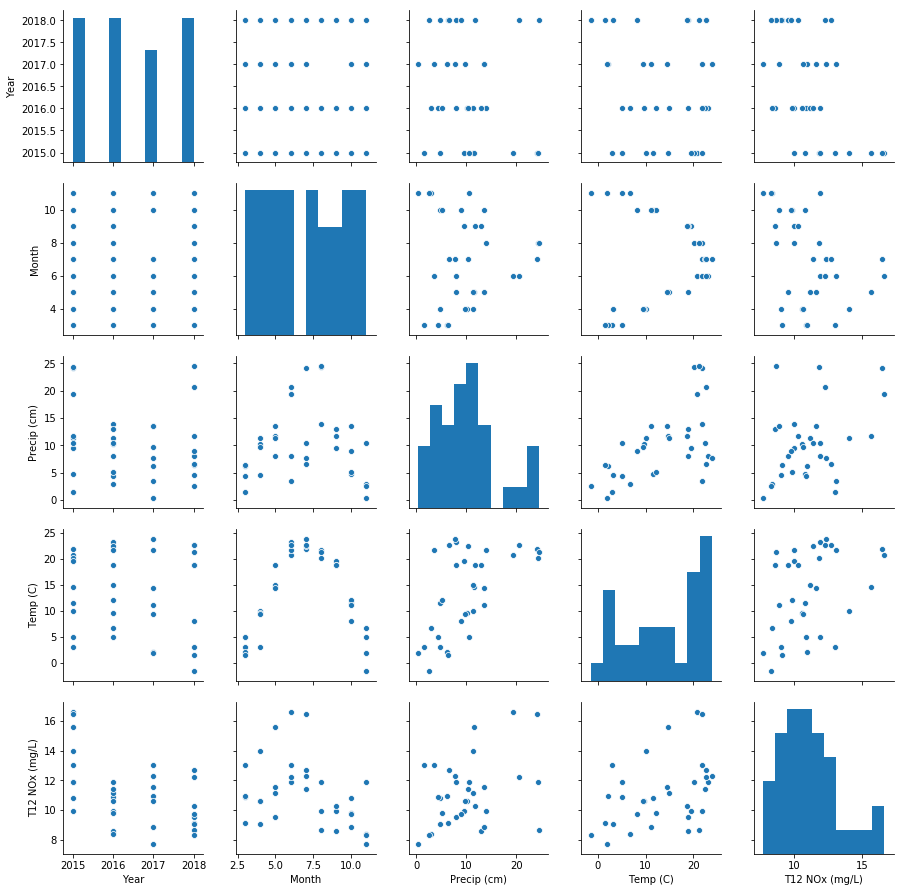

In [30]:
feature = dataset.iloc[:, [0,1,2,3,6]]
sns.pairplot(feature)

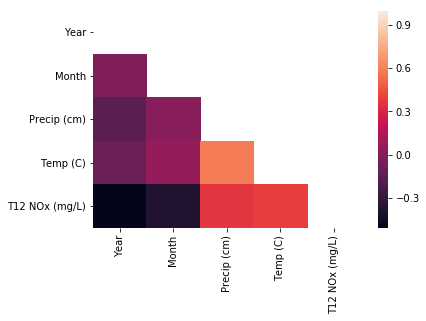

In [31]:
corr = feature.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


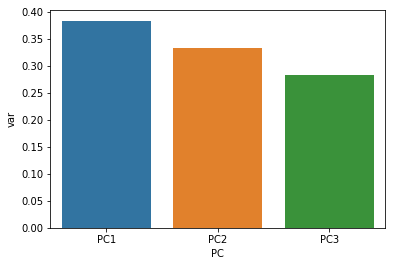

In [32]:
from sklearn.preprocessing import StandardScaler

X_data = feature.iloc[:,0:3]
Y_data = feature.iloc[:,4]

scaled_data = StandardScaler()
scaled_X = scaled_data.fit_transform(X_data)

from sklearn.decomposition import PCA
pcal = PCA(n_components =3)
pcal.fit(scaled_X)
trained_pcal = pcal.transform(scaled_X)

pc_df = pd.DataFrame(data=trained_pcal, columns = ['PC1', 'PC2', 'PC3'])
pc_df['Cluster'] = Y_data

df = pd.DataFrame({'var':pcal.explained_variance_ratio_, 'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC', y='var', data=df)

# Discussions: 
High PC1, PC2, and PC3 variances were observed in PCAs of NOx concentration vs all three parameters (month, precipitation, and temperature) at all monitoring sites. <br>
All three parameters were equally significant in explaining NOx concentration at each monitoring site. <br>
The result was somewhat unsurprising because PCA is typically used to eliminate factors that have little effect on the responding variables, while these three factors (month, precip, temperature) were commonly known to affect NOx concentration.